## IMPORT LIBRARIES

In [909]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
pd.pandas.set_option('display.max_columns',None)
from sklearn.preprocessing import OneHotEncoder

In [911]:
import warnings
warnings.filterwarnings('ignore')

## LOAD DATASET

In [913]:
df=pd.read_csv("Processed_Flipdata - Processed_Flipdata.csv")

In [915]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [32]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


## DISPLAY FEW ROWS

In [12]:
df.head(8)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
5,5,Infinix HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
6,6,Infinix HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
7,7,Infinix HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


## Data Dimenssion

In [15]:
print("shape of dataset ",df.shape)

shape of dataset  (541, 12)


## Column Datatype




In [18]:
print("checking data types of columns:\n",df.dtypes)

checking data types of columns:
 Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object


## Information About Dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


# Identifing unique values in all columns 

In [53]:
for column in df.columns:
    print(f"\nUnique value in '{column}' column:")
    print(df[column].unique())


Unique value in 'Unnamed: 0' column:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

# check null value

In [38]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

# check duplicate value

In [43]:
df.duplicated().sum()

0

In [45]:
df.drop_duplicates()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


# Checking For Missing Values

In [31]:
missing_value_df = df.isnull().sum()
print("\n missing value in dataset :\n",missing_value_df)


 missing value in dataset :
 Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


# Drop Column

In [941]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [568]:
df[df['Model']== ' Redmi']

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize


# FEATURE EXTRACTION

* A Statistical Analysis

In [69]:
df.select_dtypes(include=['number']).mean()

Memory            110.550832
RAM                 5.397412
Battery_         4871.587800
AI Lens             0.062847
Mobile Height      16.431201
dtype: float64

In [73]:
df.select_dtypes(include=['number']).median()

Memory            128.00
RAM                 6.00
Battery_         5000.00
AI Lens             0.00
Mobile Height      16.71
dtype: float64

In [75]:
df.select_dtypes(include=['number']).mode()

,Memory,RAM,Battery_,AI Lens,Mobile Height
0,128,4,5000,0,16.76


In [77]:
df.select_dtypes(include=['number']).std()

Memory            60.600694
RAM                1.984923
Battery_         780.148862
AI Lens            0.242911
Mobile Height      2.523553
dtype: float64

In [79]:
df.select_dtypes(include=['number']).var()

Memory             3672.444171
RAM                   3.939919
Battery_         608632.246443
AI Lens               0.059006
Mobile Height         6.368318
dtype: float64

* Skewness per column

In [81]:
df.select_dtypes(include=['number']).skew()

Memory           1.029704
RAM              0.067617
Battery_        -3.304250
AI Lens          3.612638
Mobile Height    1.171778
dtype: float64

* Kurtosis per column
  

In [83]:
df.select_dtypes(include=['number']).kurt()

Memory            0.855888
RAM              -1.306301
Battery_         14.752188
AI Lens          11.092146
Mobile Height    48.220112
dtype: float64

In [80]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


# LabelEncoder





In [943]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Colour'] = label_encoder.fit_transform(df['Colour'])
df['Processor_'] = label_encoder.fit_transform(df['Processor_'])
df['Rear Camera'] = label_encoder.fit_transform(df['Rear Camera'])
df['Front Camera'] = label_encoder.fit_transform(df['Front Camera'])


In [945]:
print(df)

     Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0       23     159      64    4      6000            3            10        1   
1       23      20      64    4      6000            3            10        1   
2       37     149     128    8      5000           10             4        0   
3       69     201      32    2      5000           13            10        0   
4       12     130     128    8      5000           10            10        1   
..     ...     ...     ...  ...       ...          ...           ...      ...   
536    118      49     256    8      3900           10             2        0   
537     32      52      32    2      3100           11             6        0   
538    123     259      64    4      5000           10            12        0   
539    110      17     128    8      5000           10             7        0   
540     59     215     128    4      5000           10            12        0   

     Mobile Height  Process

# Vidualization

* Line plot

  

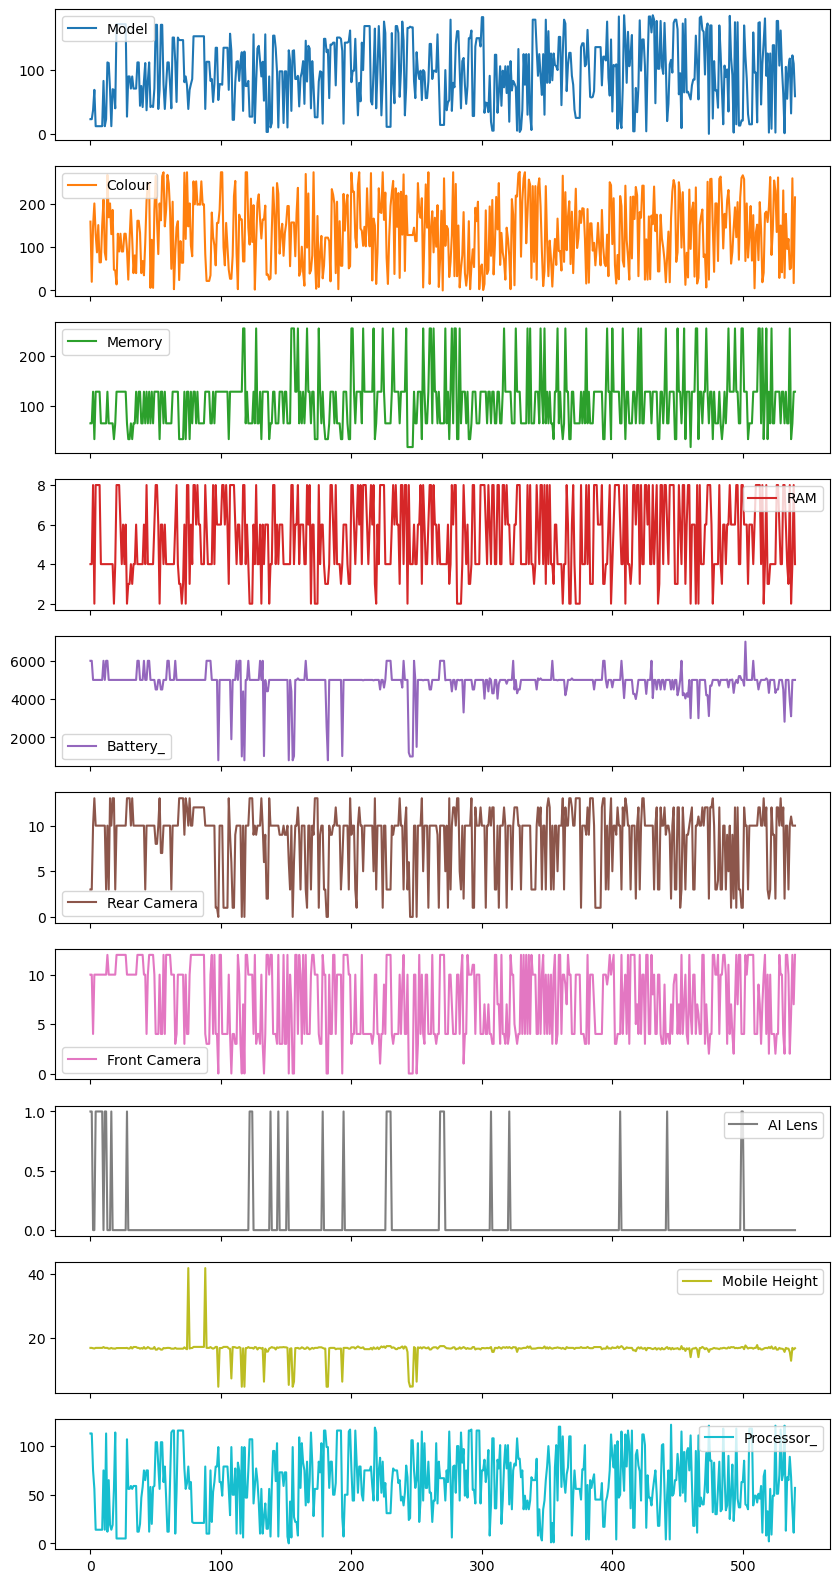

In [86]:
df.plot(subplots=True, figsize=(10, 20));
plt.show()

* Bar Plot

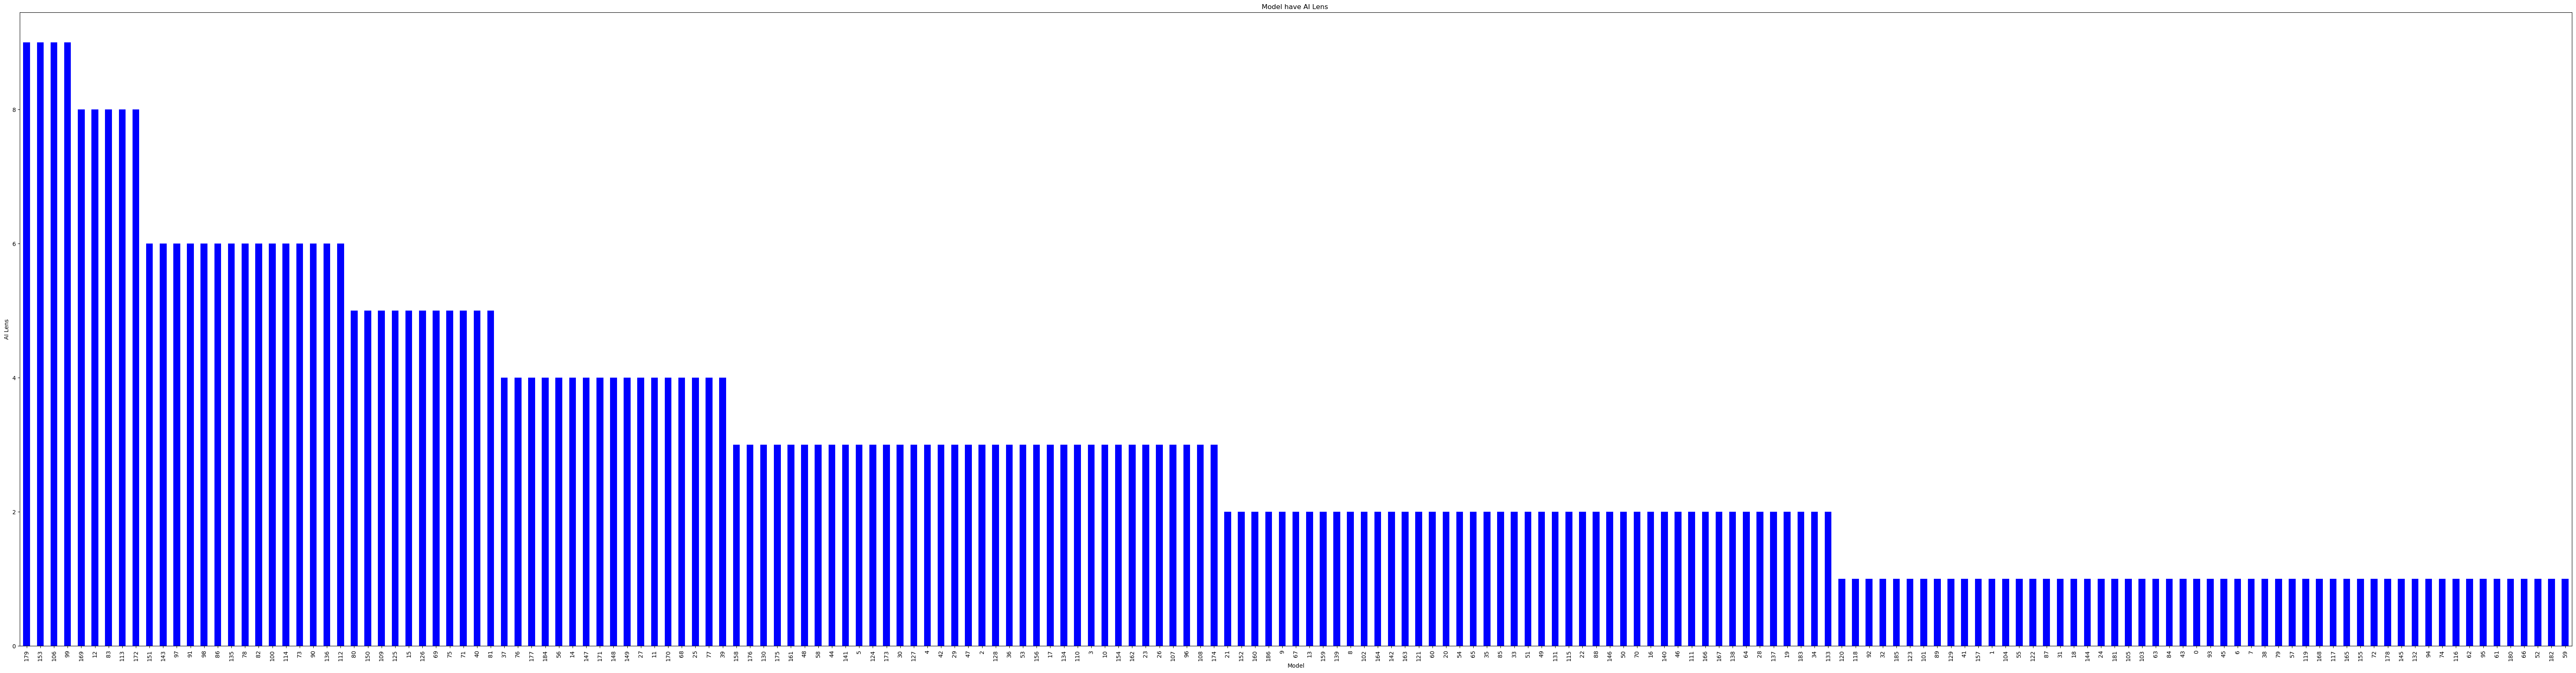

In [88]:
df['Model'].value_counts().plot(kind='bar',color='blue', figsize=(80, 20))
plt.xlabel("Model")
plt.ylabel("AI Lens")
plt.title("Model have AI Lens ")
plt.show()

* Pie plot



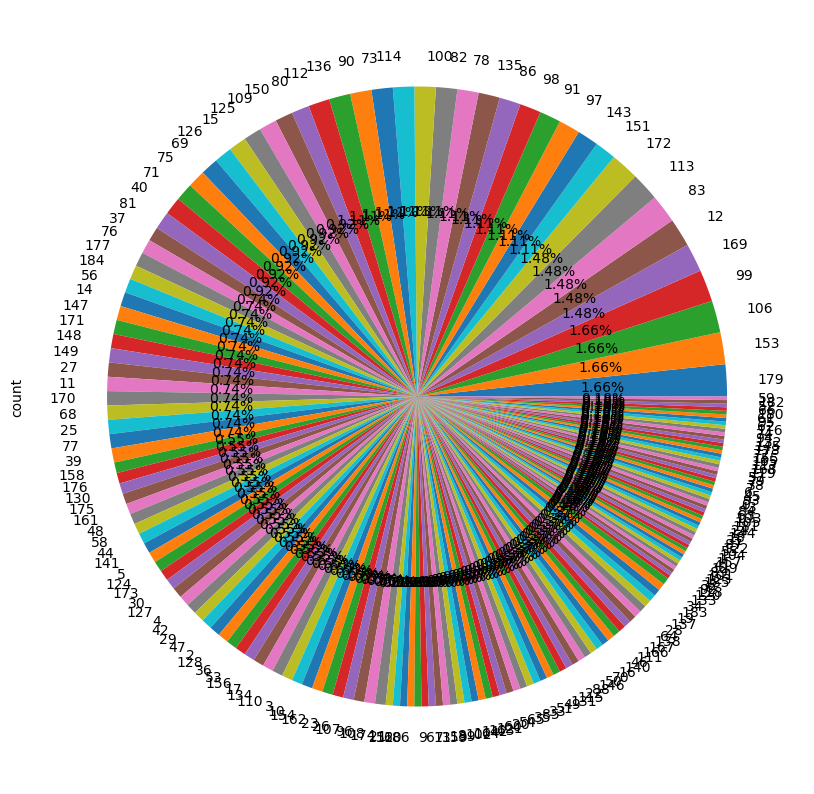

In [90]:
df['Model'].value_counts().plot(kind='pie',autopct='%0.2f%%',color='orange', figsize=(10, 12))
plt.show()

* Hist Plot

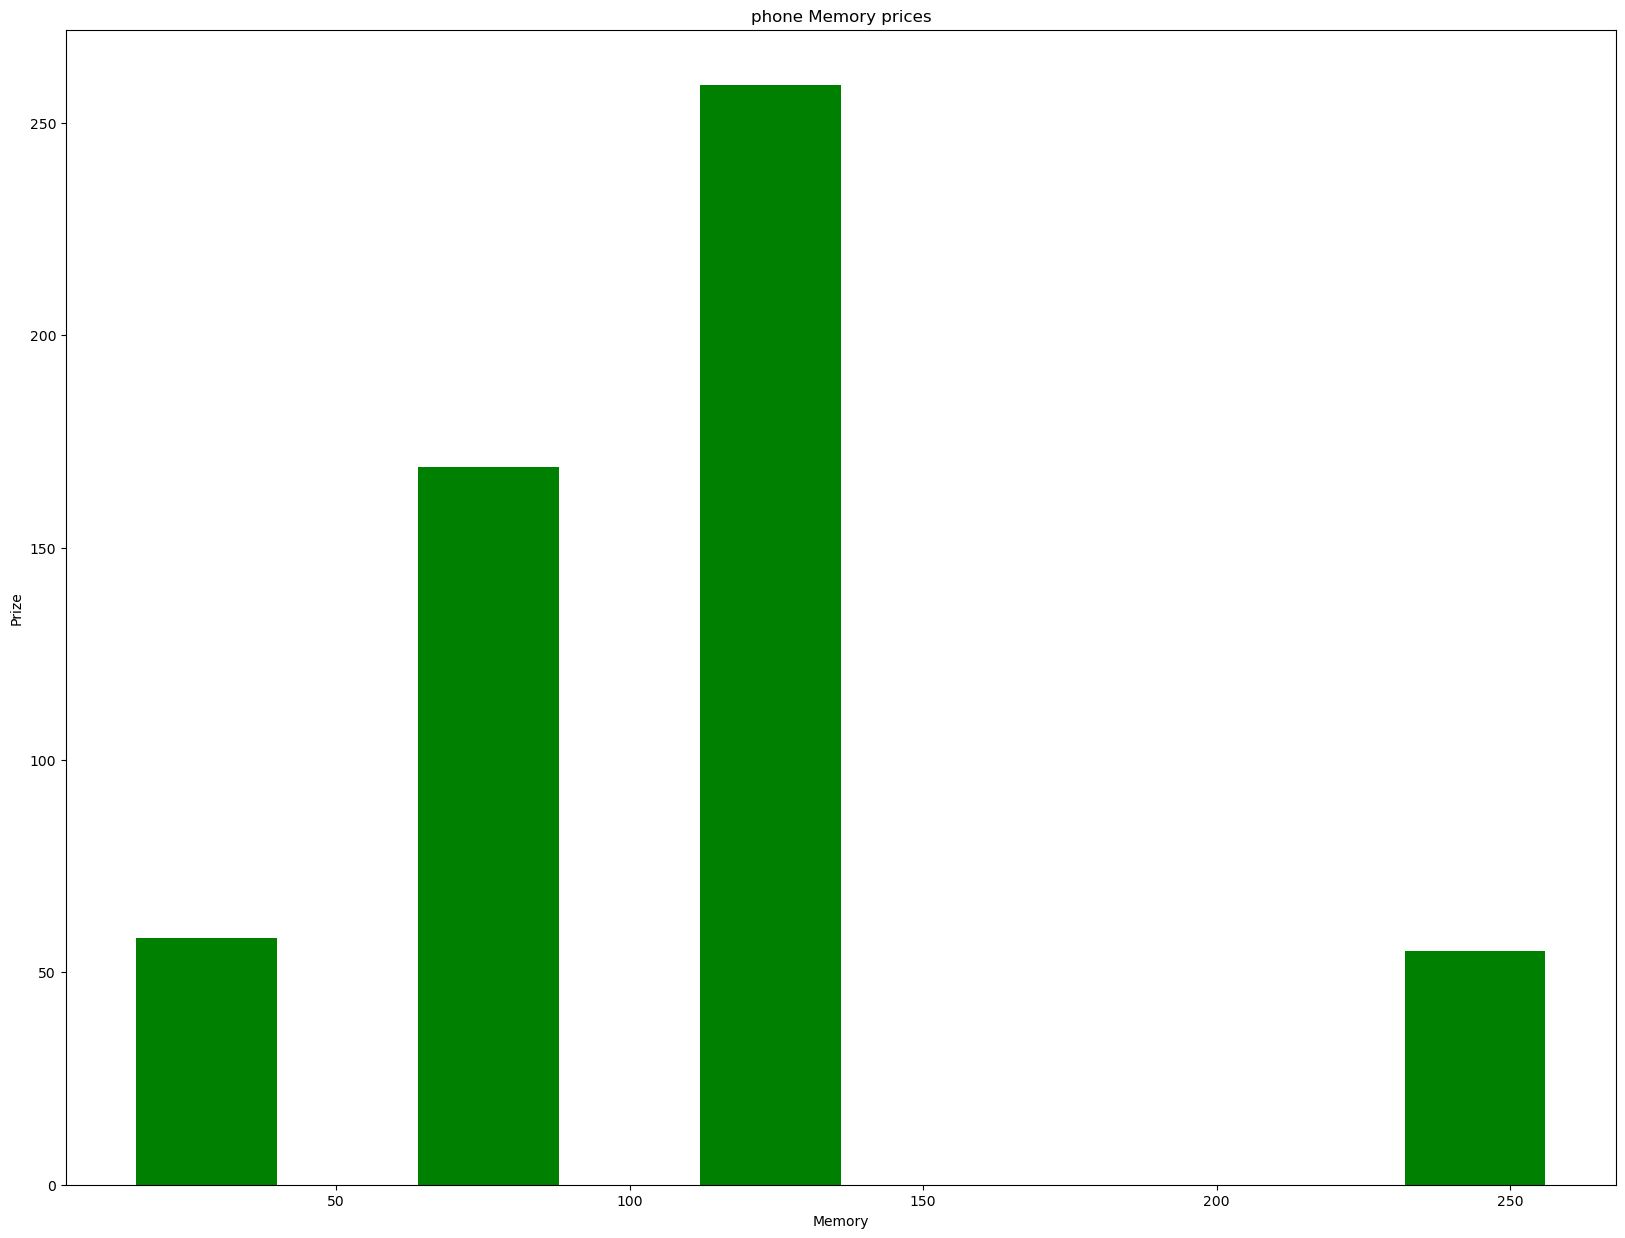

In [96]:
plt.figure(figsize=(20, 15))
plt.hist(df['Memory'],color='green')
plt.xlabel("Memory")
plt.ylabel("Prize")
plt.title("phone Memory prices")
plt.show()

* Box Plot

  

<Axes: >

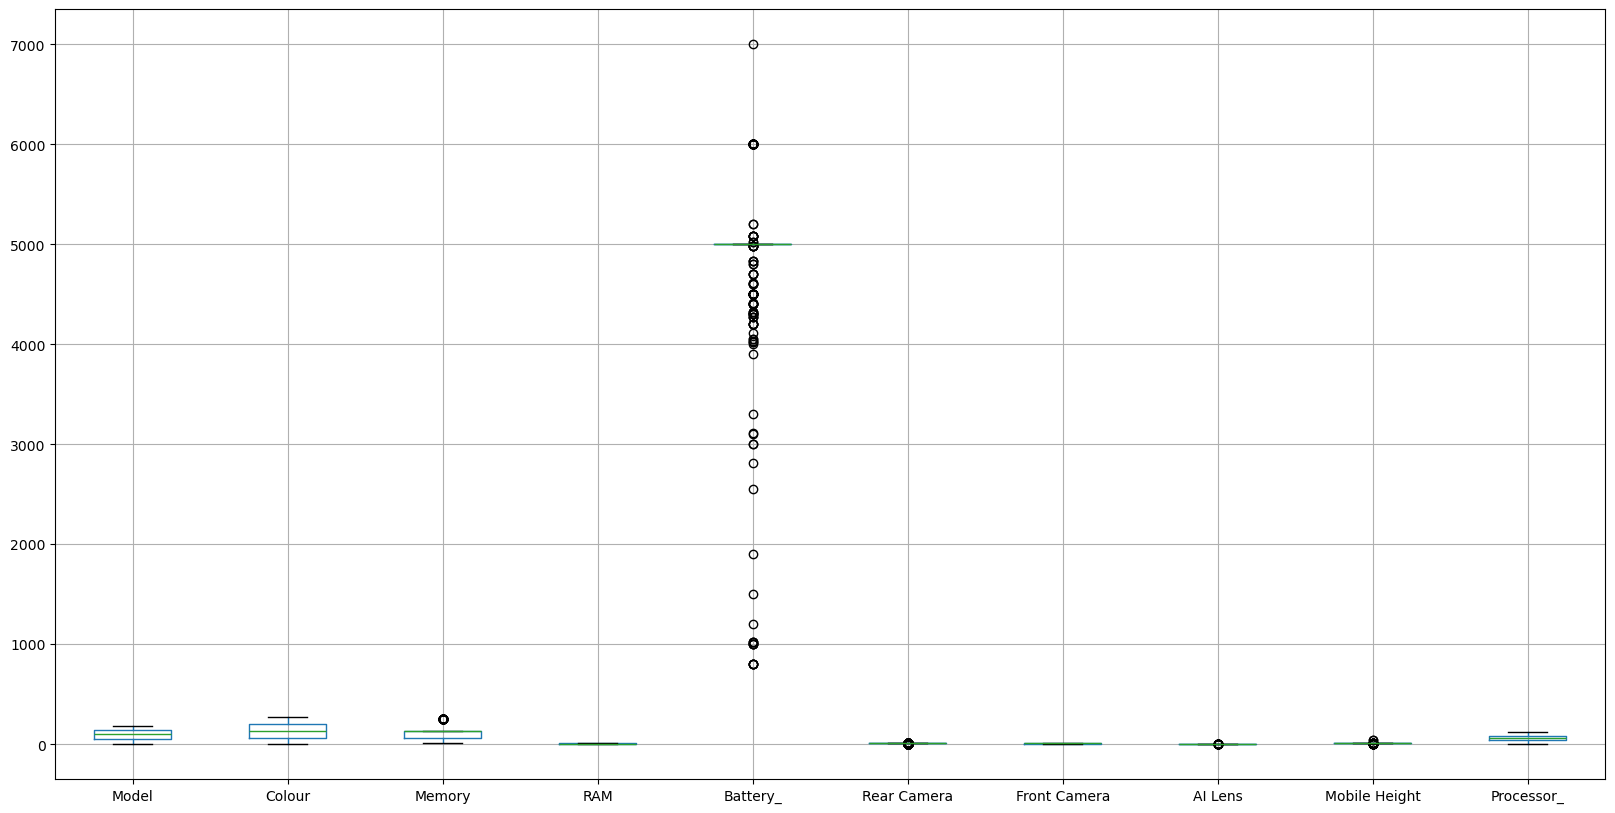

In [112]:
df.boxplot( figsize=(20, 10))

* Scatter Plot

  

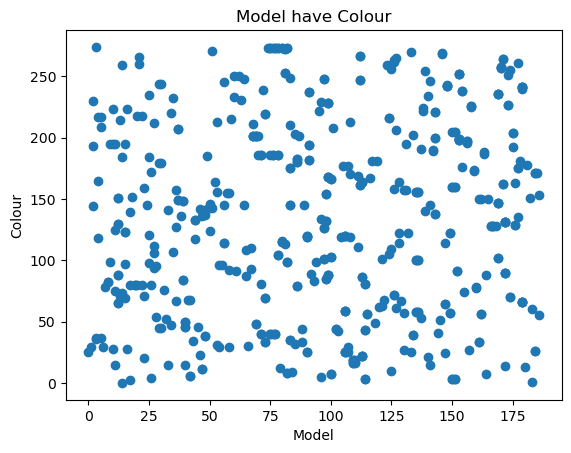

In [114]:
plt.scatter(df['Model'],df['Colour'])
plt.xlabel("Model")
plt.ylabel("Colour")
plt.title("Model have Colour")
plt.show()

# Box Plot


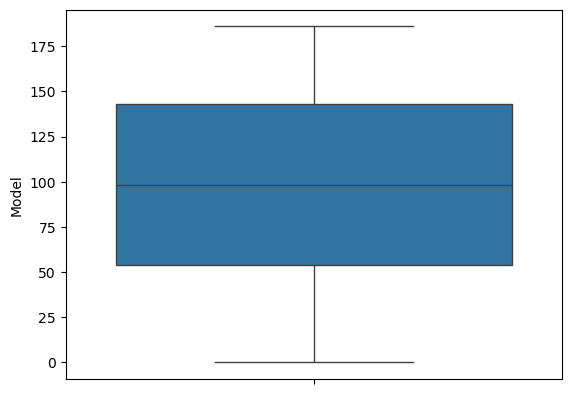

In [259]:
sns.boxplot(df['Model'])
plt.show()

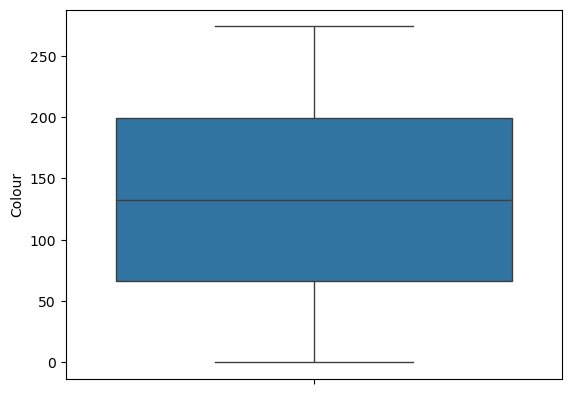

In [119]:
sns.boxplot(df['Colour'])
plt.show()

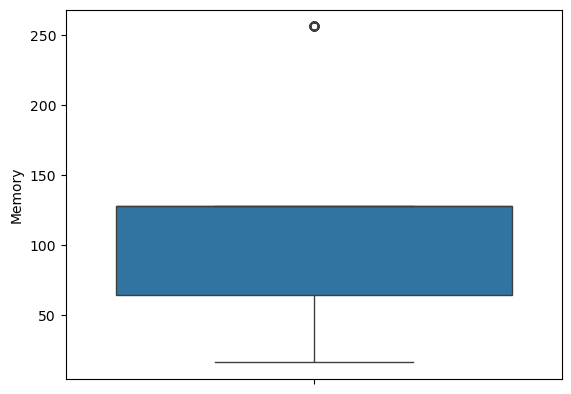

In [121]:
sns.boxplot(df['Memory'])
plt.show()

In [1025]:
#Handle outlier
q1=df['Memory'].quantile(0.25)
q2=df['Memory'].quantile(0.50)
q3=df['Memory'].quantile(0.75)
iqr= q3-q1
print("the first quantile for Memory column is",q1)
print("the second quantile for Memory column is",q2)
print("the third quantile for Memory column is",q3)

the first quantile for Memory column is 64.0
the second quantile for Memory column is 128.0
the third quantile for Memory column is 128.0


In [1027]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-32.0, 224.0)

* Outlier

In [1029]:
df.loc[(df['Memory'] > upper_limit ) | (df['Memory'] < lower_limit)]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
117,36,67,256,8,4400,10,7,0,16.64,6,"29,999"
118,129,67,256,8,800,0,0,0,4.50,99,"1,299"
127,81,113,256,8,5000,9,3,0,16.94,77,"17,999"
154,36,157,256,8,4400,10,7,0,16.64,6,"29,999"
155,130,157,256,8,800,0,0,0,4.50,99,"1,299"
156,131,157,256,4,1020,6,0,0,6.10,27,"2,499"
159,91,237,256,8,5080,12,4,0,16.76,8,"23,999"
166,82,99,256,8,5000,1,4,0,16.94,84,"23,999"
175,82,8,256,8,5000,1,4,0,16.94,84,"23,999"
200,81,272,256,8,5000,9,3,0,16.94,77,"17,999"


In [146]:
# triming the data
new_df= df[(df['Memory'] <= upper_limit) & (df['Memory'] >= lower_limit)]

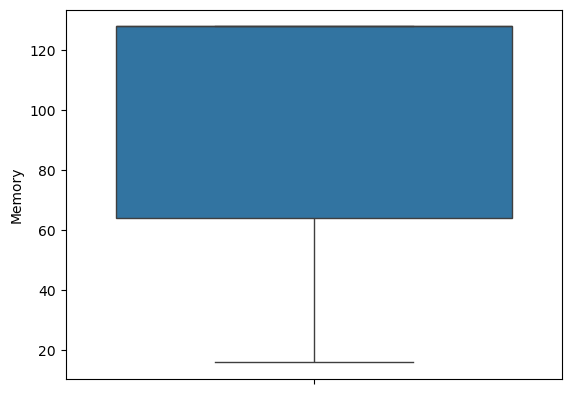

In [148]:
sns.boxplot(new_df['Memory'])
plt.show()

In [150]:
#capping
new_df = df.copy()
new_df.loc[(new_df['Memory']>upper_limit), 'Memory'] = upper_limit
new_df.loc[(new_df['Memory']<lower_limit), 'Memory'] = lower_limit

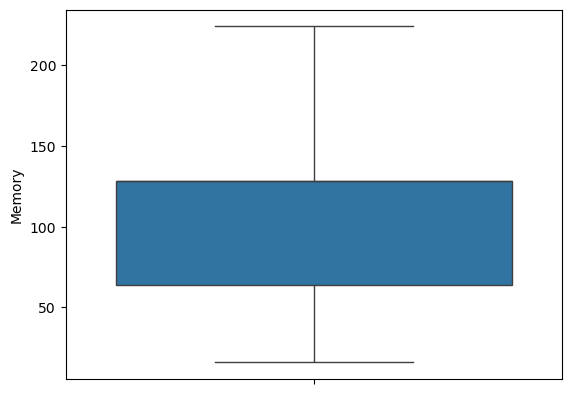

In [152]:
sns.boxplot(new_df['Memory'])
plt.show()

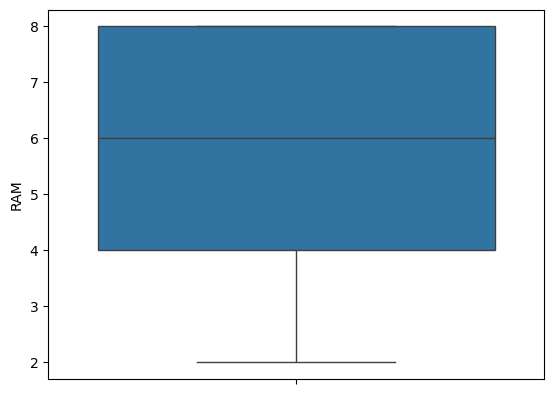

In [156]:
sns.boxplot(df['RAM'])
plt.show()

In [158]:
#outlier
df.loc[(df['RAM'] > upper_limit ) | (df['RAM'] < lower_limit)].count()[0]

0

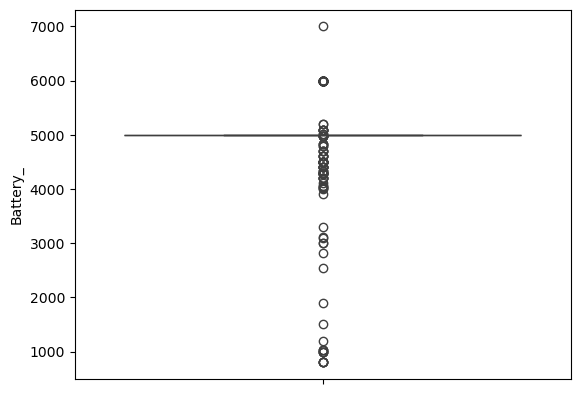

In [160]:
sns.boxplot(df['Battery_'])
plt.show()

In [1017]:
#Handle outlier
q1=df['Battery_'].quantile(0.25)
q2=df['Battery_'].quantile(0.50)
q3=df['Battery_'].quantile(0.75)
iqr= q3-q1
print("the first quantile for Battery_ column is",q1)
print("the second quantile for Battery_ column is",q2)
print("the third quantile for Battery_ column is",q3)

the first quantile for Battery_ column is 5000.0
the second quantile for Battery_ column is 5000.0
the third quantile for Battery_ column is 5000.0


In [1019]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(5000.0, 5000.0)

* outlier

In [1021]:
df.loc[(df['Battery_'] > upper_limit ) | (df['Battery_'] < lower_limit)]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,"7,299"
1,23,20,64,4,6000,3,10,1,16.76,113,"7,299"
10,83,210,64,4,6000,10,10,0,17.02,75,"9,499"
12,23,71,64,4,6000,3,10,1,16.76,113,"7,299"
13,112,267,128,4,6000,10,12,0,16.76,12,"10,699"
...,...,...,...,...,...,...,...,...,...,...,...
527,177,261,128,8,4500,12,4,0,16.21,51,"23,999"
531,63,231,128,8,4500,12,4,0,16.33,72,"20,890"
532,1,29,64,8,2815,2,2,0,15.49,121,"53,999"
536,118,49,256,8,3900,10,2,0,15.49,89,"79,999"


In [172]:
# triming the data
new_df= df[(df['Battery_'] <= upper_limit) & (df['Battery_'] >= lower_limit)]

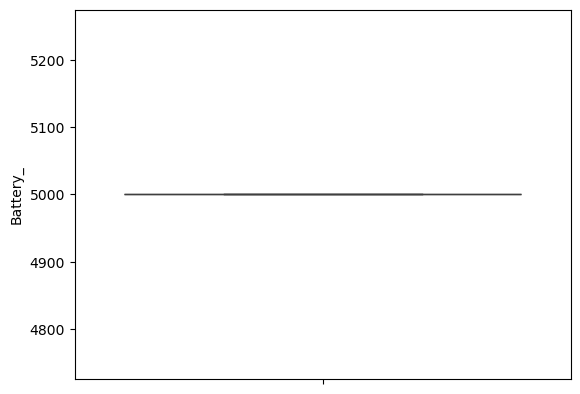

In [174]:
sns.boxplot(new_df['Battery_'])
plt.show()

In [176]:
#capping
new_df = df.copy()
new_df.loc[(new_df['Battery_']>upper_limit), 'Battery_'] = upper_limit
new_df.loc[(new_df['Battery_']<lower_limit), 'Battery_'] = lower_limit

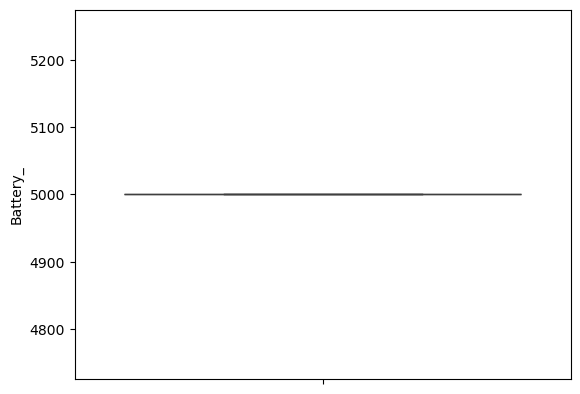

In [178]:
sns.boxplot(new_df['Battery_'])
plt.show()

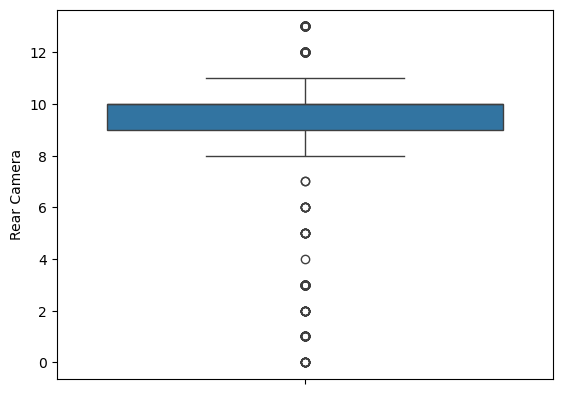

In [163]:
sns.boxplot(df['Rear Camera'])
plt.show()

In [1031]:
#Handle outlier
q1=df['Rear Camera'].quantile(0.25)
q2=df['Rear Camera'].quantile(0.50)
q3=df['Rear Camera'].quantile(0.75)
iqr= q3-q1
print("the first quantile for Rear Camera column is",q1)
print("the second quantile for Rear Camera column is",q2)
print("the third quantile for Rear Camera column is",q3)

the first quantile for Rear Camera column is 9.0
the second quantile for Rear Camera column is 10.0
the third quantile for Rear Camera column is 10.0


In [1033]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(7.5, 11.5)

* Outlier

In [1035]:
df.loc[(df['Rear Camera'] > upper_limit ) | (df['Rear Camera'] < lower_limit)]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,"7,299"
1,23,20,64,4,6000,3,10,1,16.76,113,"7,299"
3,69,201,32,2,5000,13,10,0,16.56,56,"5,649"
12,23,71,64,4,6000,3,10,1,16.76,113,"7,299"
14,111,169,64,4,5000,3,10,0,16.51,65,"7,299"
...,...,...,...,...,...,...,...,...,...,...,...
527,177,261,128,8,4500,12,4,0,16.21,51,"23,999"
529,162,150,64,4,5000,13,10,0,16.51,117,"8,460"
531,63,231,128,8,4500,12,4,0,16.33,72,"20,890"
532,1,29,64,8,2815,2,2,0,15.49,121,"53,999"


In [188]:
# triming the data
new_df= df[(df['Rear Camera'] <= upper_limit) & (df['Rear Camera'] >= lower_limit)]

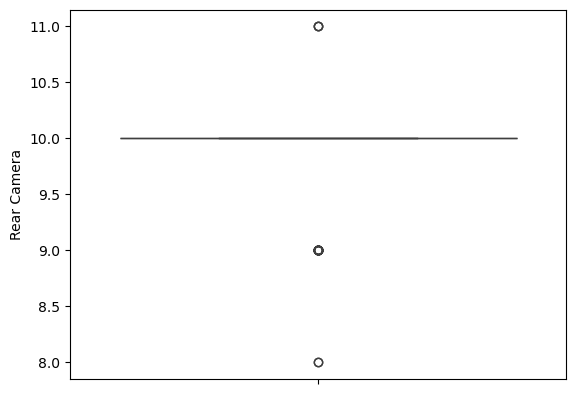

In [190]:
sns.boxplot(new_df['Rear Camera'])
plt.show()

In [192]:
#capping
new_df = df.copy()
new_df.loc[(new_df['Rear Camera']>upper_limit), 'Rear Camera'] = upper_limit
new_df.loc[(new_df['Rear Camera']<lower_limit), 'Rear Camera'] = lower_limit

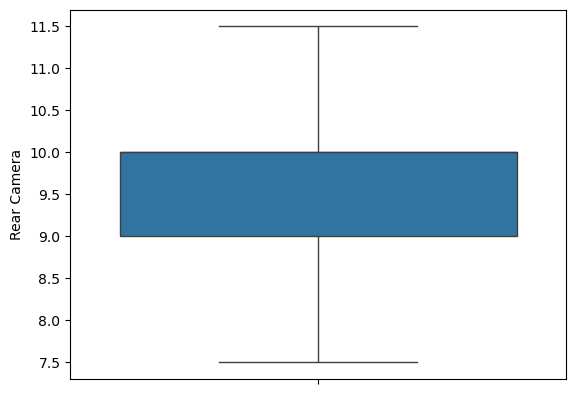

In [194]:
sns.boxplot(new_df['Rear Camera'])
plt.show()

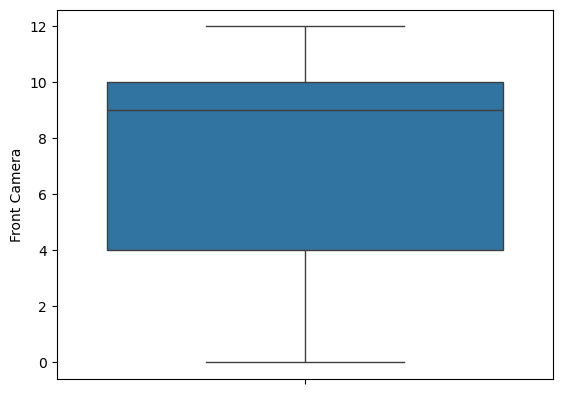

In [196]:
sns.boxplot(df['Front Camera'])
plt.show()

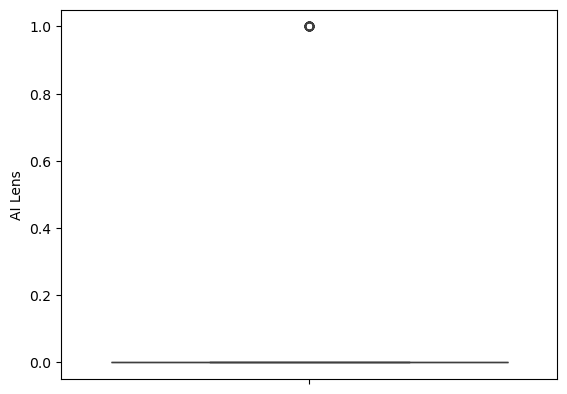

In [206]:
sns.boxplot(df['AI Lens'])
plt.show()

In [1037]:
#Handle outlier
q1=df['AI Lens'].quantile(0.25)
q2=df['AI Lens'].quantile(0.50)
q3=df['AI Lens'].quantile(0.75)
iqr= q3-q1
print("the first quantile for AI Lens column is",q1)
print("the second quantile for AI Lens column is",q2)
print("the third quantile for AI Lens column is",q3)

the first quantile for AI Lens column is 0.0
the second quantile for AI Lens column is 0.0
the third quantile for AI Lens column is 0.0


In [1039]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(0.0, 0.0)

* Outlier
  

In [1043]:
df.loc[(df['AI Lens'] > upper_limit ) | (df['AI Lens'] < lower_limit)]

34

In [229]:
# triming the data
new_df= df[(df['AI Lens'] <= upper_limit) & (df['AI Lens'] >= lower_limit)]
new_df= df[(df['AI Lens'] <= upper_limit) & (df['AI Lens'] >= lower_limit)]

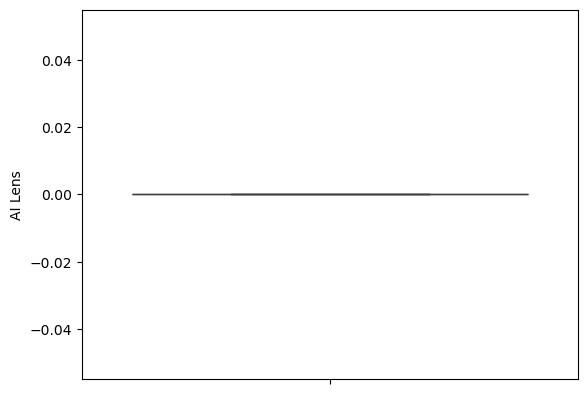

In [231]:
sns.boxplot(new_df['AI Lens'])
plt.show()

In [233]:
#capping
new_df = df.copy()
new_df.loc[(new_df['AI Lens']>upper_limit), 'AI Lens'] = upper_limit
new_df.loc[(new_df['AI Lens']<lower_limit), 'AI Lens'] = lower_limit

<Axes: ylabel='AI Lens'>

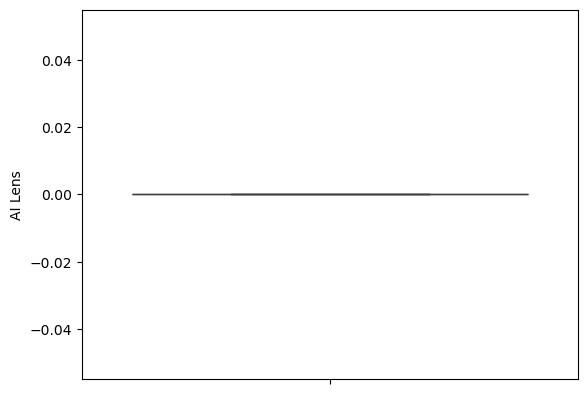

In [235]:
sns.boxplot(new_df['AI Lens'])

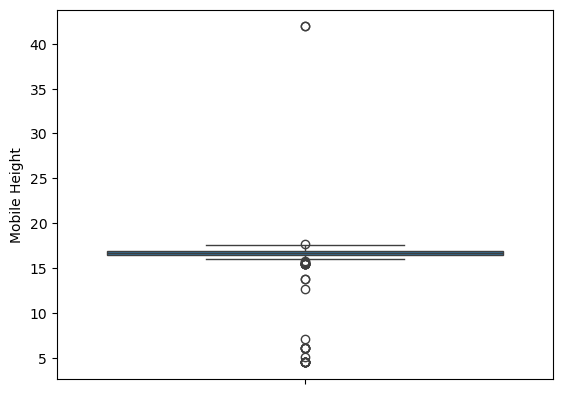

In [237]:
sns.boxplot(df['Mobile Height'])
plt.show()

In [1045]:
#Handle outlier
q1=df['Mobile Height'].quantile(0.25)
q2=df['Mobile Height'].quantile(0.50)
q3=df['Mobile Height'].quantile(0.75)
iqr= q3-q1
print("the first quantile for Mobile Height column is",q1)
print("the second quantile for Mobile Height column is",q2)
print("the third quantile for Mobile Height column is",q3)

the first quantile for Mobile Height column is 16.51
the second quantile for Mobile Height column is 16.71
the third quantile for Mobile Height column is 16.94


In [1047]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(15.865000000000002, 17.585)

* Outlier

In [1049]:
df.loc[(df['Mobile Height'] > upper_limit ) | (df['Mobile Height'] < lower_limit)]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
75,39,148,128,8,5000,10,4,0,41.94,79,"16,499"
88,39,84,128,8,5000,10,4,0,41.94,79,"16,499"
98,53,156,128,6,800,0,0,0,4.50,99,"1,449"
108,130,27,128,8,1900,6,0,0,7.11,99,"1,849"
116,128,164,128,4,1000,0,0,0,4.50,99,"1,422"
118,129,67,256,8,800,0,0,0,4.50,99,"1,299"
133,52,164,128,4,1020,6,0,0,6.10,27,"2,615"
135,3,36,128,6,4410,2,12,0,15.60,15,"28,999"
136,3,37,128,6,4410,2,12,0,15.60,15,"28,999"
152,131,195,64,4,800,6,0,0,5.08,0,"2,490"


In [269]:
# triming the data
new_df= df[(df['Mobile Height'] <= upper_limit) & (df['Mobile Height'] >= lower_limit)]

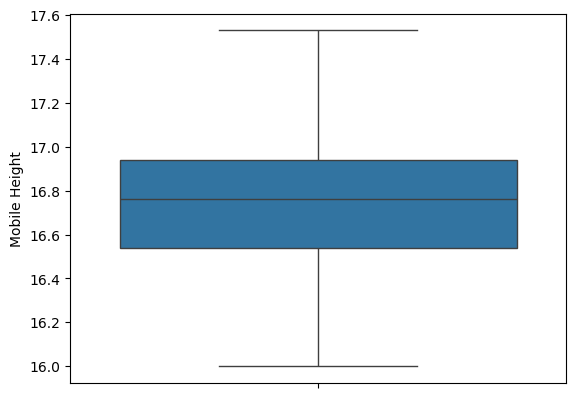

In [271]:
sns.boxplot(new_df['Mobile Height'])
plt.show()

In [277]:
#capping
new_df = df.copy()
new_df.loc[(new_df['Mobile Height']>upper_limit), 'Mobile Height'] = upper_limit
new_df.loc[(new_df['Mobile Height']<lower_limit), 'Mobile Height'] = lower_limit

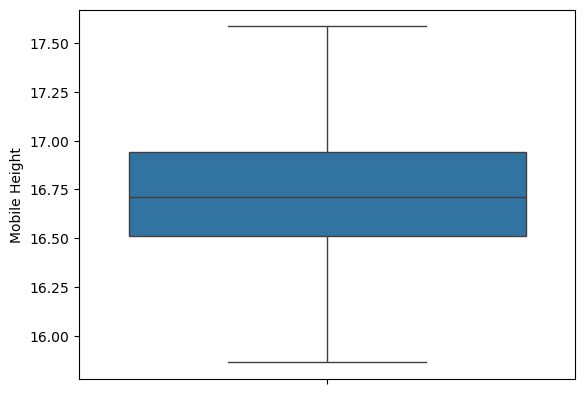

In [279]:
sns.boxplot(new_df['Mobile Height'])
plt.show()

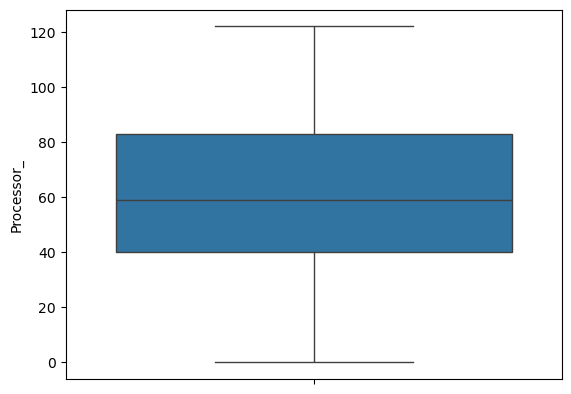

In [239]:
sns.boxplot(df['Processor_'])
plt.show()

* Correlation

In [1053]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,"7,299"
1,23,20,64,4,6000,3,10,1,16.76,113,"7,299"
2,37,149,128,8,5000,10,4,0,16.64,75,"11,999"
3,69,201,32,2,5000,13,10,0,16.56,56,"5,649"
4,12,130,128,8,5000,10,10,1,16.76,14,"8,999"


In [595]:
df['Prize'] = df['Prize'].str.replace(',','')
print(df)

     Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0       23     159      64    4      6000            3            10        1   
1       23      20      64    4      6000            3            10        1   
2       37     149     128    8      5000           10             4        0   
3       69     201      32    2      5000           13            10        0   
4       12     130     128    8      5000           10            10        1   
..     ...     ...     ...  ...       ...          ...           ...      ...   
536    118      49     256    8      3900           10             2        0   
537     32      52      32    2      3100           11             6        0   
538    123     259      64    4      5000           10            12        0   
539    110      17     128    8      5000           10             7        0   
540     59     215     128    4      5000           10            12        0   

     Mobile Height  Process

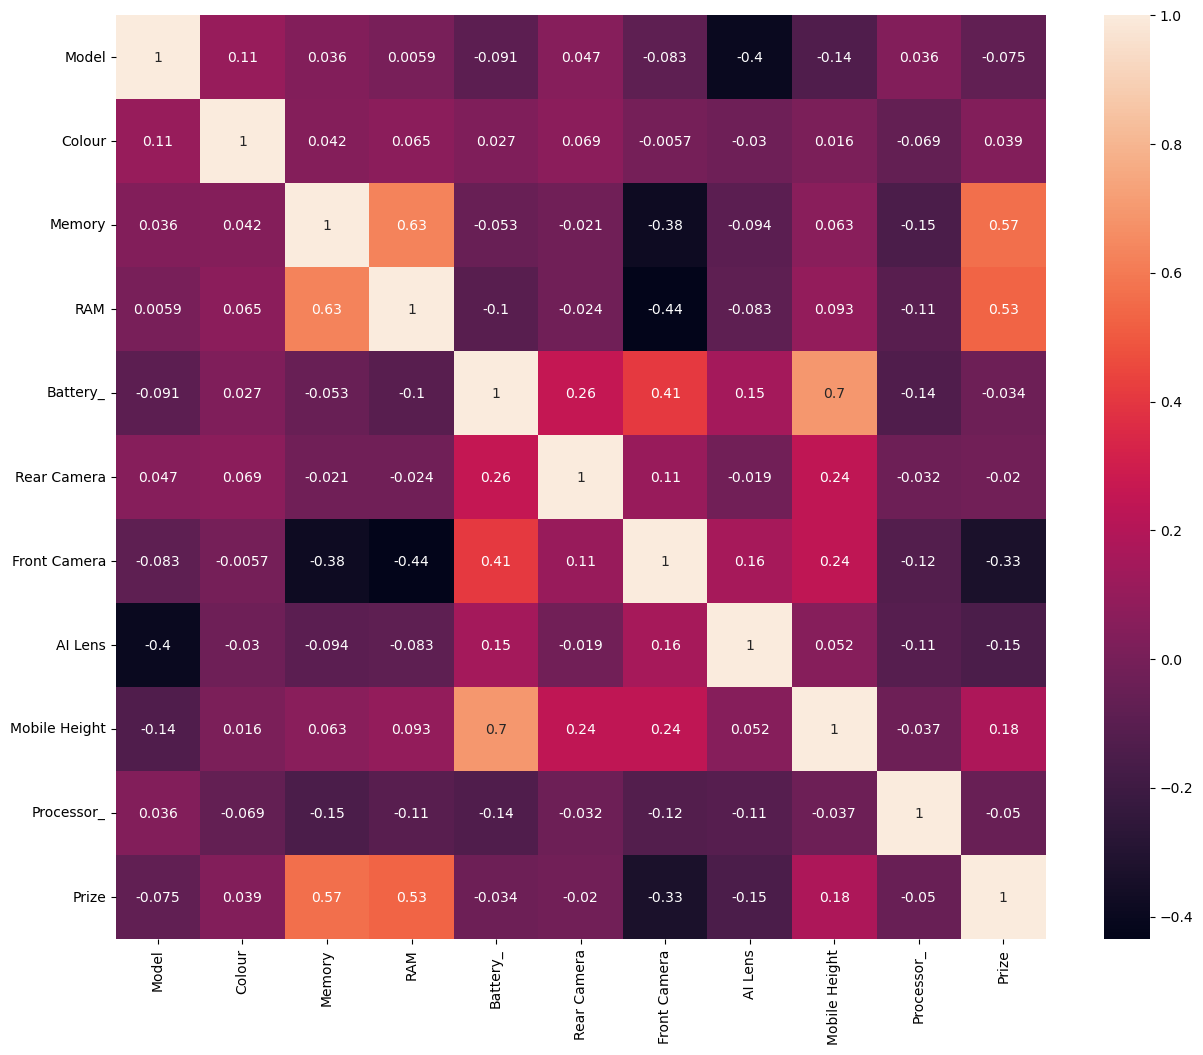

In [352]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building

In [576]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [496]:
df.shape

(541, 11)

In [371]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,7299
1,23,20,64,4,6000,3,10,1,16.76,113,7299
2,37,149,128,8,5000,10,4,0,16.64,75,11999
3,69,201,32,2,5000,13,10,0,16.56,56,5649
4,12,130,128,8,5000,10,10,1,16.76,14,8999


In [802]:
X = df[['Model','Colour','Memory','RAM','Battery_','Front Camera','Processor_']]
y = df['Prize']

In [804]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((432, 7), (109, 7))

In [806]:
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
     Model  Colour  Memory  RAM  Battery_  Front Camera  Processor_
244    166     128      16    8      1200             0          24
540     59     215     128    4      5000            12          57
417      4     165     128    8      4270            12          16
509     96       5     128    6      5000             4          49
353    126      72      64    4      5000            10           1
..     ...     ...     ...  ...       ...           ...         ...
71     147      64      32    3      5000            10         116
106     69      48      32    3      5000            10          56
270     14       0      64    4      6000            12          67
435    102      44      32    2      5000            10          18
102    135     100     128    8      5000             4          79

[432 rows x 7 columns]

X_test:
     Model  Colour  Memory  RAM  Battery_  Front Camera  Processor_
229     11     125      64    4      6000            12          31
73    

* Linear Regression

In [659]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

In [661]:
X = df[['Prize','Colour','Memory','RAM','Battery_','Front Camera']]
y = df['Model']

In [810]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [812]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [814]:
y_pred = model.predict(X_test)

In [669]:
print("mean squared error is: ", mean_squared_error(y_test, y_pred))

mean squared error is:  2824.2399433048417


In [671]:
print(" root mean squared error is: ", root_mean_squared_error(y_test, y_pred))

 root mean squared error is:  53.143578570744005


In [673]:
print(" r2 score: ", r2_score(y_test, y_pred))

 r2 score:  -0.007962782452239248


* Random Forest

In [695]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [697]:
df= df.dropna(subset=['Battery_'])

In [822]:
X = df[['Model','Colour','Prize','RAM','Memory','Front Camera']]
y = df['Battery_']

In [824]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [826]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [828]:
y_pred = rf_classifier.predict(X_test)

In [768]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

         800       0.00      0.00      0.00         1
        1000       0.50      1.00      0.67         1
        1500       0.00      0.00      0.00         1
        2550       0.00      0.00      0.00         0
        3900       0.00      0.00      0.00         1
        4200       0.00      0.00      0.00         3
        4323       1.00      1.00      1.00         1
        4400       1.00      1.00      1.00         2
        4500       1.00      0.62      0.77         8
        4610       1.00      1.00      1.00         1
        4700       0.00      0.00      0.00         0
        4980       1.00      0.50      0.67         2
        5000       0.90      1.00      0.94        77
        5080       1.00      1.00      1.00         1
        5200       0.00      0.00      0.00         1
        6000       1.00      0.89      0.94         9

    accuracy                           0

* Random Forest Regression

In [710]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [834]:
df= df.dropna(subset=['Memory'])

In [836]:
X = df[['Model','Colour','Prize','RAM','Battery_','Front Camera']]
y = df['Memory']

In [848]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [850]:
print("mean squared error is: ", mean_squared_error(y_test, y_pred))

mean squared error is:  1231.1117504587155


In [852]:
print(" root mean squared error is: ", root_mean_squared_error(y_test, y_pred))

 root mean squared error is:  35.08720208934756


In [854]:
print(" r2 score is: ", r2_score(y_test, y_pred))

 r2 score is:  0.706886190285644


* Decision Tree

In [800]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [858]:
X = df[['Memory','Colour','Prize','RAM','Battery_','Front Camera']]
y = df['Model']

In [862]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42)

In [866]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [868]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4785276073619632


In [880]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Memory','Colour','Prize','RAM','Battery_','Front Camera']]
y = df['Model']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [882]:
print("mean squared error is: ", mean_squared_error(y_test, y_pred))

mean squared error is:  2786.680981595092


In [884]:
print(" root mean squared error is: ", root_mean_squared_error(y_test, y_pred))

 root mean squared error is:  52.78902330594015


In [886]:
print(" r2 score is: ", r2_score(y_test, y_pred))

 r2 score is:  -0.04428672086249952
